<a href="https://colab.research.google.com/github/BruceHMoraes/DeepLearning/blob/main/Trabalho_MiniVGGNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
from keras import backend as K
from keras import utils as utls
from tensorflow.keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout

In [ ]:
# Definição de Hiperparâmetros
imageRows, imageCols, cores = 32, 32, 3
batchSize = 64
numClasses = 10
epochs = 5

In [ ]:
# Carrega o dataset CIFAR-10
(XTreino, yTreino), (XTeste, yTeste) = cifar10.load_data()

In [ ]:
# Normaliza os dados
XTreino = XTreino / 255.0
XTeste = XTeste / 255.0
yTreino = utls.to_categorical(yTreino, numClasses)
yTeste = utls.to_categorical(yTeste, numClasses)

In [ ]:
XTreino.shape

(50000, 32, 32, 3)

In [ ]:
inputShape = (imageRows, imageCols, cores)

In [ ]:
# Modelo Lenet
model = Sequential()
model.add(Conv2D(20, (5,5), padding='same', input_shape=inputShape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(50, (5,5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dense(numClasses))
model.add(Activation('softmax'))
model.summary()

In [ ]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
minhaLeNetModel = model.fit(XTreino, yTreino, batch_size=batchSize, epochs=epochs, validation_data=(XTeste, yTeste))

In [ ]:
nomeDosRotulos = ["avião", "carro", "pássaro", "gato", "cervo", "cachorro", "sapo", "cavalo", "navio", "caminhão"]
predicao = model.predict(XTeste)
print(classification_report(yTeste.argmax(axis=1), predicao.argmax(axis=1), target_names=nomeDosRotulos))

In [ ]:
f, ax = plt.subplots()
ax.plot(minhaLeNetModel.history['accuracy'], 'o-')
ax.plot(minhaLeNetModel.history['val_accuracy'], 'x-')
ax.legend(['Acurácia no Treinamento', 'Acurácia na Validação'], loc=0)
ax.set_title('Treinamento e Validação - Acurácia por Época')
ax.set_xlabel('Época')
ax.set_ylabel('Acurácia')

In [ ]:
# Modelo MiniVGGNet

model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=inputShape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_23 (Activation)           │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_24 (Activation)           │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_25 (Activation)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_26 (Activation)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_27 (Activation)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           5,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_28 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,168,362 (8.27 MB)

 Trainable params: 2,168,362 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
minhaMiniVGGNet = model.fit(XTreino, yTreino, batch_size=batchSize, epochs=epochs, validation_data=(XTeste, yTeste))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 285s 361ms/step - accuracy: 0.3540 - loss: 1.7563 - val_accuracy: 0.5801 - val_loss: 1.1733
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 272s 348ms/step - accuracy: 0.5946 - loss: 1.1352 - val_accuracy: 0.6576 - val_loss: 0.9714
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 267s 341ms/step - accuracy: 0.6610 - loss: 0.9513 - val_accuracy: 0.6988 - val_loss: 0.8588
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 324s 344ms/step - accuracy: 0.7039 - loss: 0.8377 - val_accuracy: 0.7374 - val_loss: 0.7588
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 268s 343ms/step - accuracy: 0.7433 - loss: 0.7397 - val_accuracy: 0.7483 - val_loss: 0.7193


In [ ]:
nomeDosRotulos = ["avião", "carro", "pássaro", "gato", "cervo", "cachorro", "sapo", "cavalo", "navio", "caminhão"]
predicao = model.predict(XTeste)
print(classification_report(yTeste.argmax(axis=1), predicao.argmax(axis=1), target_names=nomeDosRotulos))

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step
              precision    recall  f1-score   support

       avião       0.70      0.84      0.77      1000
       carro       0.91      0.86      0.88      1000
     pássaro       0.70      0.56      0.62      1000
        gato       0.57      0.59      0.58      1000
       cervo       0.68      0.71      0.69      1000
    cachorro       0.73      0.58      0.65      1000
        sapo       0.72      0.87      0.79      1000
      cavalo       0.86      0.77      0.81      1000
       navio       0.85      0.86      0.85      1000
    caminhão       0.80      0.86      0.83      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



Text(0, 0.5, 'Acurácia')

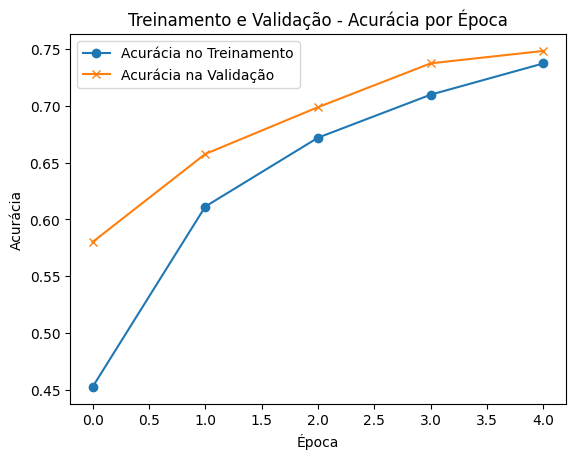

In [ ]:
f, ax = plt.subplots()
ax.plot(minhaMiniVGGNet.history['accuracy'], 'o-')
ax.plot(minhaMiniVGGNet.history['val_accuracy'], 'x-')
ax.legend(['Acurácia no Treinamento', 'Acurácia na Validação'], loc=0)
ax.set_title('Treinamento e Validação - Acurácia por Época')
ax.set_xlabel('Época')
ax.set_ylabel('Acurácia')

In [ ]:
# Modelo CoviXNet
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', input_shape=inputShape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(numClasses))
model.add(Activation('softmax'))
model.summary()

In [ ]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
CovixNet = model.fit(XTreino, yTreino, batch_size=batchSize, epochs=epochs, validation_data=(XTeste, yTeste))

In [ ]:
nomeDosRotulos = ["avião", "carro", "pássaro", "gato", "cervo", "cachorro", "sapo", "cavalo", "navio", "caminhão"]
predicao = model.predict(XTeste)
print(classification_report(yTeste.argmax(axis=1), predicao.argmax(axis=1), target_names=nomeDosRotulos))

In [ ]:
f, ax = plt.subplots()
ax.plot(CovixNet.history['accuracy'], 'o-')
ax.plot(CovixNet.history['val_accuracy'], 'x-')
ax.legend(['Acurácia no Treinamento', 'Acurácia na Validação'], loc=0)
ax.set_title('Treinamento e Validação - Acurácia por Época')
ax.set_xlabel('Época')
ax.set_ylabel('Acurácia')